In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)
# %reload_ext autoreload
# %autoreload 2

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import csv
import sys
import glob
import pickle
import random
import re
import scipy
from scipy import signal
from scipy.signal import filtfilt
import itertools
from sklearn.preprocessing import LabelEncoder
import os
# import torch
# import fastai
import librosa
import librosa.display
import librosa.core, librosa.feature
import yaml
import time
from sklearn import metrics
from tqdm import tqdm
# from fastai.vision import *
np.random.seed(0)
import seaborn as sns
sns.set_palette("husl") 
# from torchvision.models import resnet50
# from torchvision.models import mobilenet_v2
# from torchvision.models import vgg16
# from fastai.callbacks import *

from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# from fastai import *
# from fastai.dataset import ModelData,ArraysIndexDataset
# from fastai.dataloader import DataLoader
# from fastai.learner import Learner

# import torch
# import torch.nn as nn
import keras.models
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, BatchNormalization, Activation

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
os.getcwd()

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020'

In [6]:
os.chdir(os.path.join(os.getcwd(), 'pump_basedir'))

In [7]:
directory = os.getcwd()
os.makedirs(os.path.join(directory, 'dataset'), exist_ok=True)
# os.makedirs("/content/models", exist_ok=True)
# os.makedirs("/content/plots", exist_ok=True)
# os.chdir("/content/gdrive/My Drive/Sound_Analytics/")
# os.getcwd()

In [8]:
# import zipfile

# # "dev_data_pump.zip", 
# files_to_extract = ["pump_basedir.zip"]
# for fp in files_to_extract:
#   path_to_zip_file = f"/content/gdrive/My Drive/Sound_Analytics/{fp}"
#   directory_to_extract_to = '/content/dataset/'
#   print("Extracting zip file: %s" % path_to_zip_file)
#   with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)
#   print("Extracted at: %s" % directory_to_extract_to)

In [9]:
# !ls

In [10]:
# !nvidia-smi -L

### Set up Logs

In [11]:
########################################################################
# setup STD I/O
########################################################################
"""
Standard output is logged in "baseline.log".
"""
import logging

logging.basicConfig(level=logging.DEBUG, filename="baseline.log")
logger = logging.getLogger(' ')
handler = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

'\nStandard output is logged in "baseline.log".\n'

In [12]:
########################################################################
# argparse
########################################################################
import argparse
def command_line_chk():
    parser = argparse.ArgumentParser(description='Without option argument, it will not run properly.')
    parser.add_argument('-v', '--version', action='store_true', help="show application version")
    parser.add_argument('-e', '--eval', action='store_true', help="run mode Evaluation")
    parser.add_argument('-d', '--dev', action='store_true', help="run mode Development")
    args = parser.parse_args()
    if args.version:
        print("===============================")
        print("DCASE 2020 task 2 baseline\nversion {}".format(__versions__))
        print("===============================\n")
    if args.eval ^ args.dev:
        if args.dev:
            flag = True
        else:
            flag = False
    else:
        flag = None
        print("incorrect argument")
        print("please set option argument '--dev' or '--eval'")
    return flag
########################################################################

In [13]:
# load parameter yaml
with open("baseline.yaml") as stream:
    param = yaml.safe_load(stream)

In [14]:
def file_load(wav_name, mono=False):
    """
    load .wav file.

    wav_name : str
        target .wav file
    sampling_rate : int
        audio file sampling_rate
    mono : boolean
        When load a multi channels file and this param True, the returned data will be merged for mono data

    return : np.array( float )
    """
    try:
        return librosa.load(wav_name, sr=None, mono=mono)
        # frames = 5
        # n_mels=64
        # power = 2.0
        # dims = n_mels * frames
        # mel_spectrogram = librosa.feature.melspectrogram(y=y,
        #                                                 n_fft=1024,
        #                                                 hop_length=512,
        #                                                 n_mels=n_mels,
        #                                                 power=2.0)

        # # 03 convert melspectrogram to log mel energy
        # log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)

        # # 04 calculate total vector size
        # vectorarray_size = len(log_mel_spectrogram[0, :]) - frames + 1

        # # 05 skip too short clips
        # if vectorarray_size < 1:
        #     return np.empty((0, dims), float)

        # # 06 generate feature vectors by concatenating multi_frames
        # vectorarray = np.zeros((vectorarray_size, dims), float)
        # for t in range(frames):
        #     vectorarray[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + vectorarray_size].T
        
    except:
        print("file_broken or not exists!! : {}".format(wav_name))

    

Sample Test of Function

In [15]:
# y = librosa.load('/content/dataset/pump/train/normal_id_04_00000164.wav', sr=None, mono=True)[0]
# frames = 5
# n_mels=64
# power = 2.0
# dims = n_mels * frames
# mel_spectrogram = librosa.feature.melspectrogram(y=y,
#                                                 n_fft=1024,
#                                                 hop_length=512,
#                                                 n_mels=n_mels,
#                                                 power=2.0)

# # 03 convert melspectrogram to log mel energy
# log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)
# print ('Shape of log_mel_spectrogram is: ', log_mel_spectrogram.shape)

# # 04 calculate total vector size
# vectorarray_size = len(log_mel_spectrogram[0, :]) - frames + 1
# print ('total vector size is: ', vectorarray_size)

# # 05 skip too short clips
# if vectorarray_size < 1:
#     np.empty((0, dims), float)

# # 06 generate feature vectors by concatenating multi_frames
# vectorarray = np.zeros((vectorarray_size, dims), float)
# print ('shape of vectorarray is: ', vectorarray.shape)
# for t in range(frames):
#     vectorarray[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + vectorarray_size].T
# print ('shape of vectorarray is: ', vectorarray.shape)

In [16]:
# # LOADING TRAINING DATA
# directory = r'/content/dataset/pump/train'
# root = [sound for sound in glob.glob(os.path.join(directory)+"/*.wav")]
# filenames_train = [i for i in os.listdir(directory) if i.endswith(".wav")]

# root.sort() # ADD THIS LINE

# sounds_train = []

# # for sound in root:
# #     n= file_load(sound)
# #     sounds_train.append(n)

In [17]:
# sounds_train[0].shape

In [18]:
# df_train = pd.DataFrame({'Filename': filenames, 'Sounds': sounds_train})

In [19]:
# df_train.shape

In [20]:
# df_train.head(2)

In [21]:
# # LOADING TEST DATA
# directory = r'/content/dataset/pump/test/'
# root = [sound for sound in glob.glob(os.path.join(directory)+"/*.wav")]
# filenames_test = [i for i in os.listdir(directory) if i.endswith(".wav")]

# root.sort() # ADD THIS LINE

# sounds_test = []

# # for sound in root:
# #     n= file_load(sound)
# #     sounds_test.append(n)

In [22]:
# sounds_test[0].shape

In [23]:
# df_test = pd.DataFrame({'Filename': filenames, 'Sounds': sounds_test})

In [24]:
# df_test.shape

In [25]:
# df_test.head(2)

In [26]:
# df_test['Class'] = 'NA'
# df_test.loc[(df_test['Filename'].str.contains('normal')), 'Class'] = 0
# df_test.loc[(df_test['Filename'].str.contains('anomal')), 'Class'] = 1

In [27]:
# df_test['Class'].value_counts()

In [28]:
# train_files = list(df_train['Filename'])
# train_labels = list(df_train['Filename'])
# test_files = list(df_test['Filename'])
# test_labels = list(df_test['Filename'])

In [29]:
# train_data = list_to_vector_array(train_files,
#                                   msg="generate train_dataset",
#                                   n_mels=param["feature"]["n_mels"],
#                                   frames=param["feature"]["frames"],
#                                   n_fft=param["feature"]["n_fft"],
#                                   hop_length=param["feature"]["hop_length"],
#                                   power=param["feature"]["power"])

### Data Exploration Functions

#### Noise Filter Functions

In [85]:
def band_pass (wav_array, N=4, sr=16000):
    nyq = 0.5 * sr
    low = 100 / nyq
    high = 500 / nyq
    
    b, a = signal.butter(N, [low, high], btype='band')
    
    # apply filter
    output_signal = signal.filtfilt(b, a, wav_array)
    
    return output_signal

In [86]:
def pre_emphasis(wav_array, coef = 0.97):
    wav_array = librosa.effects.preemphasis(wav_array, coef=coef)
    return wav_array

Comparison of Sound File With & Without Pre-Emphasis

Text(0.5, 1.0, 'Original signal')

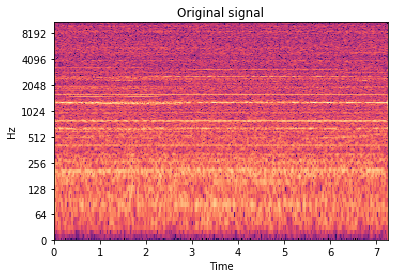

Text(0.5, 1.0, 'Pre-emphasized signal')

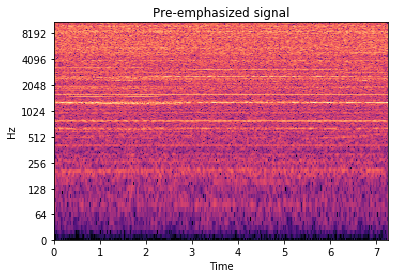

In [87]:
directory = r'C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump\train'
filename = 'normal_id_04_00000164.wav'

y, sr = file_load(os.path.join(directory, filename))
y_filt = pre_emphasis(y, 0.98)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)

# print(type(S_orig))
librosa.display.specshow(S_orig, y_axis='log', x_axis='time')
plt.title('Original signal')
plt.show()
#
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')
plt.show()

<Figure size 1008x360 with 0 Axes>

Text(0.5, 1.0, 'Original signal')

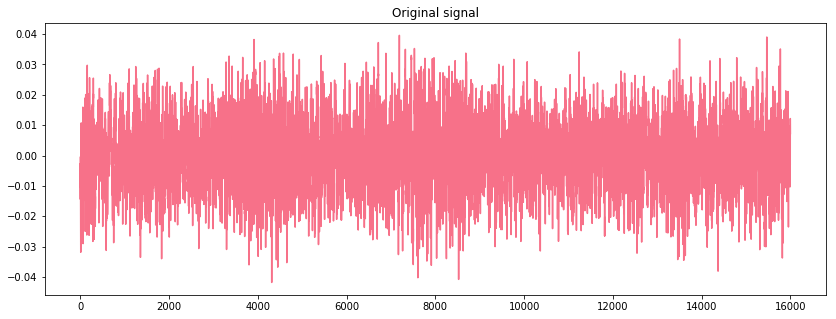

<Figure size 1008x360 with 0 Axes>

Text(0.5, 1.0, 'Pre-emphasized signal')

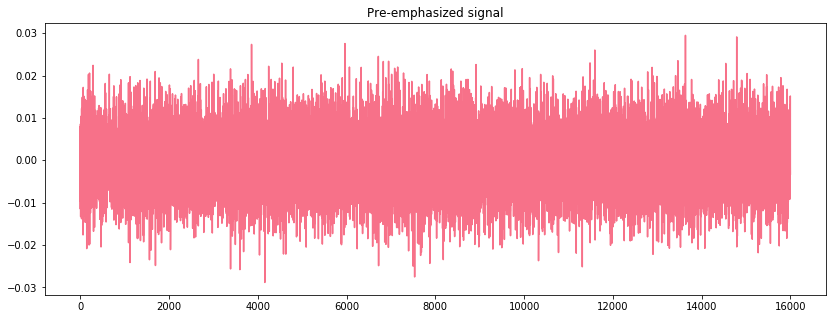

In [88]:
plt.figure(figsize=(14, 5))
plt.plot(y[0:16000])
plt.title('Original signal')
plt.show()

# plt.figure(figsize=(14, 5))
#plotting the sampled signal
# librosa.display.waveplot(y)
# plt.show()

plt.figure(figsize=(14, 5))
plt.plot(y_filt[0:16000])
plt.title('Pre-emphasized signal')
plt.show()

In [89]:
y.shape

(160000,)

In [90]:
S_preemph.shape

(1025, 313)

In [91]:
def mean_normalization (wav_array, axis=0):
    return minmax_scale(wav_array, axis=axis)

# temp = mean_normalization(S_preemph)
# temp.shape

In [92]:
def get_log_mel_spectrogram(filename, n_mels=64,
                        n_fft=1024,
                        hop_length=512,
                        power=2.0):
    wav, sampling_rate = file_load(filename)
    mel_spectrogram = librosa.feature.melspectrogram(y=wav,
                                                     sr=sampling_rate,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_mels=n_mels,
                                                     power=power)
    log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)
    return log_mel_spectrogram

In [93]:
def get_MFCCs(filename, n_mfcc=12,
                        n_mels=128,
                        n_fft=1024,
                        hop_length=512,
                        power=2.0):
    wav, sampling_rate = file_load(filename)
    mfcc = librosa.feature.mfcc(y=wav,n_mfcc=n_mfcc,
                                 sr=sampling_rate,
                                 n_fft=n_fft,
                                 hop_length=hop_length,
                                 n_mels=n_mels,
                                 power=power)
    
    return mfcc

In [94]:
def get_log_chroma_spectrogram(filename, n_chroma=64,
                        n_fft=1024,
                        hop_length=512,
                        power=.0):
    wav, sampling_rate = file_load(filename)
    chroma_spectrogram = librosa.feature.chroma_stft(y=wav,
                                                     sr=sampling_rate,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_chroma=n_chroma)
    log_chroma_spectrogram = chroma_spectrogram
    #log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)
    return log_chroma_spectrogram

In [95]:
def get_gammatone(path2,nfilts=64, n_fft=1024, hop_length=512, power=2.0):
    sr = librosa.get_samplerate(path2)
    y, _ = librosa.load(path2, sr=sr)



    S, n_fft = librosa.core.spectrum._spectrogram(y=y, S=None, n_fft=n_fft, hop_length=hop_length, power=power)
    

    filter_gammatone = spafe.fbanks.gammatone_fbanks.gammatone_filter_banks(nfilts=nfilts, nfft=n_fft, fs=sr)
    gammatone_spec = np.dot(filter_gammatone, S)
   

    gammatone_spec = 20.0 / power * np.log10(gammatone_spec + sys.float_info.epsilon)

    
    return gammatone_spec

LFCC implementation

In [221]:
def lin(sr, n_fft, n_filter=128, fmin=0.0, fmax=None, dtype=np.float32):

    if fmax is None:
        fmax = float(sr) / 2
    # Initialize the weights
    n_filter = int(n_filter)
    weights = np.zeros((n_filter, int(1 + n_fft // 2)), dtype=dtype)

    # Center freqs of each FFT bin
    fftfreqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # 'Center freqs' of liner bands - uniformly spaced between limits
    linear_f = np.linspace(fmin, fmax, n_filter + 2)

    fdiff = np.diff(linear_f)
    ramps = np.subtract.outer(linear_f, fftfreqs)

    for i in range(n_filter):
        # lower and upper slopes for all bins
        lower = -ramps[i] / fdiff[i]
        upper = ramps[i + 2] / fdiff[i + 1]

        # .. then intersect them with each other and zero
        weights[i] = np.maximum(0, np.minimum(lower, upper))

    return weights


def linear_spec(y=None,
                sr=22050,
                n_fft=2048,
                hop_length=512,
                win_length=None,
                window='hann',
                center=True,
                pad_mode='reflect',
                power=2.0,
                **kwargs):
    S = np.abs(
        librosa.core.stft(y=y,
                          n_fft=n_fft,
                          hop_length=hop_length,
                          win_length=win_length,
                          window=window,
                          center=center,
                          pad_mode=pad_mode))**power
    filter = lin(sr=sr, n_fft=n_fft, **kwargs)
    return np.dot(filter, S)


def lfcc_calc(y=None,
         sr=16000,
         S=None,
         n_lfcc=40,
         dct_type=2,
         norm='ortho',
         **kwargs):
    if S is None:
        S = librosa.power_to_db(linear_spec(y=y, sr=sr, **kwargs))
    M = scipy.fftpack.dct(S, axis=0, type=dct_type, norm=norm)[:n_lfcc]
    return M

In [96]:
# directory = r'/content/dataset/pump/test'
# for j in [0,1]:
#   fig, ax = plt.subplots(1, 2, figsize = (15, 5))
#   for i in range(0,2):
#     temp = df_test[df_test['Class'] == j]
#     sound = temp['Sounds'].iloc[i]
#     file_name = temp['Filename'].iloc[i]
#     ax[i].set_title(file_name)
#     ax[i].imshow(sound)
#     ax[i].axis('off')
#   plt.show()

In [97]:
np.min(S_orig), np.max(S_orig), np.mean(S_orig), np.std(S_orig)

(-80.0, 0.0, -36.26435, 7.474259)

In [98]:
S_orig

array([[-24.507034, -30.6956  , -62.056015, ..., -39.262184, -48.989243,
        -30.132622],
       [-24.23361 , -30.546999, -54.901947, ..., -37.45173 , -39.347427,
        -28.335537],
       [-22.519379, -28.23952 , -36.105473, ..., -47.132507, -32.962875,
        -28.164957],
       ...,
       [-37.837708, -39.902435, -37.31244 , ..., -44.912075, -41.33954 ,
        -49.292984],
       [-33.187653, -34.851364, -39.340324, ..., -41.600563, -45.64037 ,
        -41.899307],
       [-32.859955, -45.69455 , -42.913902, ..., -44.7518  , -67.557076,
        -43.13458 ]], dtype=float32)

In [99]:
minmax_scale(S_orig)

array([[0.7759744 , 0.6438367 , 0.12753344, ..., 0.5064296 , 0.3990268 ,
        0.6244732 ],
       [0.7797978 , 0.64646375, 0.24543715, ..., 0.533823  , 0.5230916 ,
        0.64697754],
       [0.8037684 , 0.6872576 , 0.5552155 , ..., 0.38734627, 0.605244  ,
        0.64911366],
       ...,
       [0.5895677 , 0.48106945, 0.5353239 , ..., 0.4209429 , 0.4974584 ,
        0.38453418],
       [0.6545908 , 0.5703671 , 0.501903  , ..., 0.47104836, 0.442118  ,
        0.47712278],
       [0.6591731 , 0.37867093, 0.44300807, ..., 0.42336798, 0.16010773,
        0.4616539 ]], dtype=float32)

In [100]:
librosa.util.normalize(S_orig)

array([[-0.30633792, -0.45736605, -0.88912624, ..., -0.5398157 ,
        -0.61236554, -0.37665778],
       [-0.30292013, -0.45515186, -0.7866242 , ..., -0.5149238 ,
        -0.49184284, -0.35419422],
       [-0.28149223, -0.4207703 , -0.51731205, ..., -0.6480248 ,
        -0.41203594, -0.35206196],
       ...,
       [-0.47297135, -0.59454834, -0.5346052 , ..., -0.6174961 ,
        -0.51674426, -0.6161623 ],
       [-0.41484565, -0.5192871 , -0.5636603 , ..., -0.5719661 ,
        -0.5705046 , -0.52374136],
       [-0.41074944, -0.68085116, -0.61486185, ..., -0.6152925 ,
        -0.84446347, -0.53918225]], dtype=float32)

### Feature Extraction Functions

In [222]:
########################################################################
# feature extractor
########################################################################
def file_to_vector_array(file_name,
                         n_mels=64,
                         frames=5,
                         n_fft=1024,
                         hop_length=512,
                         power=2.0):
    """
    convert file_name to a vector array.
    file_name : str
        target .wav file
    return : np.array( np.array( float ) )
        vector array
        * dataset.shape = (dataset_size, feature_vector_length)
    """
    # 01 calculate the number of dimensions
    dims = n_mels * frames

    # 02 generate melspectrogram using librosa
    y, sr = file_load(file_name)
    
    # 02.5 use pre-emphasis high-pass filter
#     y = pre_emphasis(y, 0.97)
    
    # 02.5 use mean normalization
#     y = librosa.util.normalize(y) 

    # 02.5 Band Pass Filter
    y = band_pass(y, N=4, sr=sr)
    
    stft = librosa.core.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window='hann')
    spectrogram = np.abs(stft)**2
    stft = np.real(stft)
    mel_spectrogram = librosa.feature.melspectrogram(y=y,
                                                     sr=sr,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_mels=n_mels,
                                                     power=power)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mels)
    lfcc = lfcc_calc(y=y, sr=sr, n_lfcc=n_mels)
        
#     # 03 convert melspectrogram to log mel energy
#     log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)
    
    # 03 This can also be written in one line using librosafunction - Convert to db scale
    log_mel_spectrogram = librosa.core.power_to_db(mel_spectrogram)    
    
#     # 03.5 use mean normalization
#     log_mel_spectrogram = librosa.util.normalize(log_mel_spectrogram)       

#     vector_array = stft
    
    # 04 calculate total vector size
    vector_array_size = len(log_mel_spectrogram[0, :]) - frames + 1

    # 05 skip too short clips
    if vector_array_size < 1:
        return np.empty((0, dims))

    # 06 generate feature vectors by concatenating multiframes
    vector_array = np.zeros((vector_array_size, dims))
    for t in range(frames):
        vector_array[:, n_mels * t: n_mels * (t + 1)] = lfcc[:, t: t + vector_array_size].T

    return vector_array, log_mel_spectrogram, mfcc, stft

In [223]:
import pywt

Sample Test of Function

In [224]:
directory = r'C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump\train'
filename = 'normal_id_04_00000164.wav'
vector_array, log_mel_spectrogram, mfcc, stft = file_to_vector_array(os.path.join(directory, filename),
                                    n_mels=64,
                                    frames=5,
                                    n_fft=1024,
                                    hop_length=512,
                                    power=2.0)

In [225]:
y

array([-0.00061035, -0.01025391, -0.00534058, ..., -0.0083313 ,
       -0.00057983, -0.00039673], dtype=float32)

In [226]:
# sampling information
Fs = 16000 # sample rate
T = 1/Fs # sampling period
t = 10 # seconds of sampling
N = Fs*t # total points in signal

Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

In [227]:
Pxx

array([2.51026154e-06, 4.72562357e-06, 4.91219722e-06, ...,
       2.03416121e-05, 4.58517011e-06, 2.41907000e-05])

In [228]:
np.min(Pxx), np.mean(Pxx), np.max(Pxx)

(1.337194260297894e-07, 3.0001560981976766e-05, 0.0023461455785661685)

In [229]:
len(temp)

80000

In [230]:
from scipy.fftpack import fft
temp = scipy.fft(y)
temp = np.abs(temp[: int(len(temp)/2)])
temp

array([0.40164185, 0.37804988, 0.39297578, ..., 1.627329  , 0.3668136 ,
       1.935256  ], dtype=float32)

In [231]:
scipy.fft(y)

array([-0.40164185+0.j        , -0.37804204-0.00243523j,
       -0.3925991 +0.01720186j, ..., -0.39463133+0.00499392j,
       -0.3925991 -0.01720186j, -0.37804204+0.00243523j], dtype=complex64)

In [232]:
np.real(scipy.fft(y))

array([-0.40164185, -0.37804204, -0.3925991 , ..., -0.39463133,
       -0.3925991 , -0.37804204], dtype=float32)

In [233]:
np.min(scipy.fft(y)), np.mean(scipy.fft(y)), np.max(scipy.fft(y))

((-84.93565-29.748081j),
 (-0.00061035366+7.6293943e-10j),
 (140.64807+14.325135j))

In [234]:
librosa.core.stft(y=y, n_fft=1024, hop_length=512, win_length=1024, window='hann', center = False).shape

(513, 311)

In [235]:
np.min(vector_array), np.mean(vector_array), np.max(vector_array)

(-704.4427552672876, -4.081154316735933, 143.14126965615588)

In [236]:
t=0
n_mels = 64
vector_array[:, n_mels * t: n_mels * (t + 1)].shape

(309, 64)

In [237]:
stft[:, t: t + vector_array_size].T

array([[-3.83581852e-01,  3.87851406e-01, -3.93033121e-01, ...,
         1.20961799e-03, -1.20958430e-03,  1.20957223e-03],
       [ 9.88946675e-04,  1.09630560e-03,  1.46398237e-03, ...,
        -3.17672397e-09, -3.17636276e-09, -3.17624234e-09],
       [-8.61101796e-04, -8.97901049e-04, -9.01331852e-04, ...,
         1.12300136e-10,  1.12287933e-10,  1.12283894e-10],
       ...,
       [-6.59278370e-05, -5.92583240e-05, -2.49258767e-06, ...,
         1.10819486e-09,  1.10806917e-09,  1.10802729e-09],
       [-2.22585708e-04, -2.72497268e-04, -4.85984610e-04, ...,
         6.25270561e-10,  6.25198733e-10,  6.25174812e-10],
       [ 3.89979316e-04,  4.09573171e-04,  5.06384782e-04, ...,
        -3.57728629e-10, -3.57688029e-10, -3.57674474e-10]])

In [238]:
np.real(stft)

array([[-3.83581852e-01,  9.88946675e-04, -8.61101796e-04, ...,
        -3.47192884e-05, -1.50185889e-04, -3.44491839e-03],
       [ 3.87851406e-01,  1.09630560e-03, -8.97901049e-04, ...,
        -5.07486083e-05, -1.70152726e-04, -7.14957904e-04],
       [-3.93033121e-01,  1.46398237e-03, -9.01331852e-04, ...,
        -1.07694309e-04, -1.10162474e-04,  3.96199864e-03],
       ...,
       [ 1.20961799e-03, -3.17672397e-09,  1.12300136e-10, ...,
        -6.61596869e-10, -2.40405488e-10, -2.82812309e-05],
       [-1.20958430e-03, -3.17636276e-09,  1.12287933e-10, ...,
        -6.61521920e-10, -2.40377416e-10, -1.71862231e-07],
       [ 1.20957223e-03, -3.17624234e-09,  1.12283894e-10, ...,
        -6.61496933e-10, -2.40368035e-10,  2.82845812e-05]])

In [239]:
mfcc.shape

(64, 313)

In [240]:
log_mel_spectrogram.shape

(64, 313)

In [241]:
np.min(log_mel_spectrogram), np.max(log_mel_spectrogram)

(-89.22413835198792, -9.22413835198792)

In [242]:
vector_array.shape

(309, 320)

In [243]:
# file_list = files
# # calculate the number of dimensions
# dims = 128 * 5

In [244]:
# np.zeros((log_mel_spectrogram.shape[0] * len(file_list), dims), float).shape

In [245]:
# if idx == 0:
#     dataset = np.zeros((log_mel_spectrogram.shape[0] * len(file_list), dims), float)
# dataset[log_mel_spectrogram.shape[0] * idx: log_mel_spectrogram.shape[0] * (idx + 1), :] = log_mel_spectrogram

In [247]:
########################################################################

def list_to_vector_array(file_list,
                         msg="calc...",
                         n_mels=64,
                         frames=5,
                         n_fft=1024,
                         hop_length=512,
                         power=2.0):
    """
    convert the file_list to a vector array.
    file_to_vector_array() is iterated, and the output vector array is concatenated.
    file_list : list [ str ]
        .wav filename list of dataset
    msg : str ( default = "calc..." )
        description for tqdm.
        this parameter will be input into "desc" param at tqdm.
    return : np.array( np.array( float ) )
        vector array for training (this function is not used for test.)
        * dataset.shape = (number of feature vectors, dimensions of feature vectors)
    """
    # calculate the number of dimensions
    dims = n_mels * frames

#     dataset = []
    # iterate file_to_vector_array()
    for idx in tqdm(range(len(file_list)), desc=msg):
        vector_array, log_mel_spectrogram, mfcc, stft = file_to_vector_array(file_list[idx],
                                                n_mels=n_mels,
                                                frames=frames,
                                                n_fft=n_fft,
                                                hop_length=hop_length,
                                                power=power)
        if idx == 0:
            dataset = np.zeros((vector_array.shape[0] * len(file_list), dims), float)
        dataset[vector_array.shape[0] * idx: vector_array.shape[0] * (idx + 1), :] = vector_array

#         dataset.append(vector_array)

#     return np.array(dataset)
    return dataset

In [248]:
vector_array.shape[0]

309

In [249]:
n_mels = 64
frames = 5
dims = n_mels * frames
np.zeros((vector_array.shape[0] * 3349, vector_array.shape[1]), float).shape

(1034841, 320)

### File List Generator

In [250]:
def file_list_generator(target_dir,
                        dir_name="train",
                        ext="wav"):
    """
    target_dir : str
        base directory path of the dev_data or eval_data
    dir_name : str (default="train")
        directory name containing training data
    ext : str (default="wav")
        file extension of audio files
    return :
        train_files : list [ str ]
            file list for training
    """
    logger.info("target_dir : {}".format(target_dir))

    # generate training list
    training_list_path = os.path.abspath("{dir}/{dir_name}/*.{ext}".format(dir=target_dir, dir_name=dir_name, ext=ext))
    files = sorted(glob.glob(training_list_path))
    if len(files) == 0:
        logger.exception("no_wav_file!!")

    logger.info("train_file num : {num}".format(num=len(files)))
    return files
########################################################################

In [251]:
# load dataset
def select_dirs(param, mode):
    """
    param : dict
        baseline.yaml data
    return :
        if active type the development :
            dirs :  list [ str ]
                load base directory list of dev_data
        if active type the evaluation :
            dirs : list [ str ]
                load base directory list of eval_data
    """
    if mode:
        logger.info("load_directory <- development")
        dir_path = os.path.abspath("{base}/*".format(base=param["dev_directory"]))
        dirs = sorted(glob.glob(dir_path))
    else:
        logger.info("load_directory <- evaluation")
        dir_path = os.path.abspath("{base}/*".format(base=param["eval_directory"]))
        dirs = sorted(glob.glob(dir_path))
    return dirs

########################################################################

Sample Test of Function

In [252]:
# load base_directory list
# dirs = sorted(glob.glob(os.path.abspath("/content/dataset/*")))
mode = True # For dev set
dirs = select_dirs(param=param, mode=mode)
dir_path = os.path.abspath("{base}/*".format(base=param["dev_directory"]))
dirs = sorted(glob.glob(dir_path))

2020-09-10 20:07:30,728 - INFO - load_directory <- development


In [253]:
dirs

['C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump']

In [254]:
# loop of the base directory
for dir_idx, target_dir in enumerate(dirs):
    print (dir_idx)
    print("===========================")
    print (target_dir)

0
C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump


### Model Building

In [255]:
# class Autoencoder(nn.Module):
#     def __init__(self, input_dim):
#         super(Autoencoder, self).__init__()
#         # encoder
#         self.enc1 = nn.Linear(in_features=input_dim, out_features=256)
#         self.enc1 = nn.BatchNorm1d(256)
#         self.enc2 = nn.Linear(in_features=256, out_features=128)
#         self.enc2 = nn.BatchNorm1d(256)
#         self.enc3 = nn.Linear(in_features=128, out_features=64)
#         self.enc3 = nn.BatchNorm1d(256)
#         self.enc4 = nn.Linear(in_features=64, out_features=32)
#         self.enc4 = nn.BatchNorm1d(256)
#         self.enc5 = nn.Linear(in_features=32, out_features=16)
#         self.enc5 = nn.BatchNorm1d(256)
#         # decoder 
#         self.dec1 = nn.Linear(in_features=16, out_features=32)
#         self.dec1 = nn.BatchNorm1d(256)
#         self.dec2 = nn.Linear(in_features=32, out_features=64)
#         self.dec2 = nn.BatchNorm1d(256)
#         self.dec3 = nn.Linear(in_features=64, out_features=128)
#         self.dec3 = nn.BatchNorm1d(256)
#         self.dec4 = nn.Linear(in_features=128, out_features=256)
#         self.dec4 = nn.BatchNorm1d(256)
#         self.dec5 = nn.Linear(in_features=256, out_features=input_dim)
#     def forward(self, x):
#         x = F.relu(self.enc1(x))
#         x = F.relu(self.enc2(x))
#         x = F.relu(self.enc3(x))
#         x = F.relu(self.enc4(x))
#         x = F.relu(self.enc5(x))
#         x = F.relu(self.dec1(x))
#         x = F.relu(self.dec2(x))
#         x = F.relu(self.dec3(x))
#         x = F.relu(self.dec4(x))
#         x = F.relu(self.dec5(x))
#         return x

# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# net = Autoencoder(input_dim = 320).to(device)
# print(net)

### Keras Model

In [256]:
########################################################################
# keras model
########################################################################
def get_model(inputDim):
    """
    define the keras model
    the model based on the simple dense auto encoder 
    (128*128*128*128*8*128*128*128*128)
    """
    inputLayer = Input(shape=(inputDim,))

    h = Dense(128)(inputLayer)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)
    
    h = Dense(8)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(128)(h)
    h = BatchNormalization()(h)
    h = Activation('relu')(h)

    h = Dense(inputDim)(h)

    return Model(inputs=inputLayer, outputs=h)
#########################################################################


def load_model(file_path):
    return keras.models.load_model(file_path)

In [257]:
# ########################################################################
# # keras model
# ########################################################################
# def get_model(inputDim):
#     """
#     define the keras model
#     the model based on the simple dense auto encoder 
#     (128*128*128*128*8*128*128*128*128)
#     """
#     # ENCODER
#     input_sig = Input(batch_shape=(None,128,313))
#     x = Conv1D(128,3, activation='relu', padding='valid')(input_sig)
#     x1 = MaxPooling1D(2)(x)
#     x2 = Conv1D(64,3, activation='relu', padding='valid')(x1)
#     x3 = MaxPooling1D(2)(x2)
#     flat = Flatten()(x3)
#     encoded = Dense(32,activation = 'relu')(flat)
#     #encoded = Reshape((32,1))(encoded)

#     print("shape of encoded {}".format(K.int_shape(encoded)))

#     # DECODER 
#     x2_ = Conv1D(32, 3, activation='relu', padding='valid')(x3)
#     x1_ = UpSampling1D(2)(x2_)
#     x_ = Conv1D(64, 3, activation='relu', padding='valid')(x1_)
#     upsamp = UpSampling1D(2)(x_)
#     flat = Flatten()(upsamp)
#     decoded = Dense(1389,activation = 'relu')(flat)
#     decoded = Reshape((1389,))(decoded)

#     return Model(inputs=inputLayer, outputs=h)
# #########################################################################


# def load_model(file_path):
#     return keras.models.load_model(file_path)

### Visualize Results

In [258]:
class Visualizer(object):
    def __init__(self):
        import matplotlib.pyplot as plt
        self.plt = plt
        self.fig = self.plt.figure(figsize=(30, 10))
        self.plt.subplots_adjust(wspace=0.3, hspace=0.3)

    def loss_plot(self, loss, val_loss):
        """
        Plot loss curve.
        loss : list [ float ]
            training loss time series.
        val_loss : list [ float ]
            validation loss time series.
        return   : None
        """
        ax = self.fig.add_subplot(1, 1, 1)
        ax.cla()
        ax.plot(loss)
        ax.plot(val_loss)
        ax.set_title("Model loss")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend(["Train", "Validation"], loc="upper right")
        plt.show()

    def save_figure(self, name):
        """
        Save figure.
        name : str
            save png file path.
        return : None
        """
        self.plt.savefig(name)


########################################################################


## Main Code Invoking the Functions

In [259]:
# make output directory
os.makedirs(param["model_directory"], exist_ok=True)

In [260]:
# initialize the visualizer
visualizer = Visualizer()

<Figure size 2160x720 with 0 Axes>

In [261]:
# load base_directory list
mode = True  # mode is True for dev set and False for eval set
dirs = select_dirs(param=param, mode=mode)

2020-09-10 20:07:34,129 - INFO - load_directory <- development


In [262]:
os.getcwd()

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir'

In [263]:
dirs

['C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump']

In [264]:
for idx, target_dir in enumerate(dirs):
    files = file_list_generator(target_dir)

2020-09-10 20:08:53,176 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump
2020-09-10 20:08:53,208 - INFO - train_file num : 3349


In [265]:
files[0]

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\train\\normal_id_00_00000000.wav'

In [266]:
train_data = list_to_vector_array(files,
                                  msg="generate train_dataset",
                                  n_mels=param["feature"]["n_mels"],
                                  frames=param["feature"]["frames"],
                                  n_fft=param["feature"]["n_fft"],
                                  hop_length=param["feature"]["hop_length"],
                                  power=param["feature"]["power"])

generate train_dataset: 100%|██████████████████████████████████████████████████████| 3349/3349 [08:40<00:00,  6.77it/s]


In [267]:
train_data.shape

(1034841, 640)

In [268]:
# Store train_data to pickle to directly read if run gets interrupted
out_directory = os.getcwd()
data_name = "pump_train_data_lfcc.pkl"
pickle.dump(train_data, open(os.path.join(out_directory, data_name), "wb"), protocol=4)

In [164]:
# loop of the base directory
for idx, target_dir in enumerate(dirs):
    print("\n===========================")
    print("[{idx}/{total}] {dirname}".format(dirname=target_dir, idx=idx+1, total=len(dirs)))

    # set path
    machine_type = os.path.split(target_dir)[1]
    model_file_path = "{model}/model_{machine_type}.hdf5".format(model=param["model_directory"],
                                                                  machine_type=machine_type)
    history_img = "{model}/history_{machine_type}.png".format(model=param["model_directory"],
                                                              machine_type=machine_type)

    if os.path.exists(model_file_path):
        logger.info("model exists")
        continue

    # generate dataset
    print("============== DATASET_GENERATOR ==============")
    files = file_list_generator(target_dir)
    train_data = list_to_vector_array(files,
                                      msg="generate train_dataset",
                                      n_mels=param["feature"]["n_mels"],
                                      frames=param["feature"]["frames"],
                                      n_fft=param["feature"]["n_fft"],
                                      hop_length=param["feature"]["hop_length"],
                                      power=param["feature"]["power"])

    # Store train_data to pickle to directly read if run gets interrupted
    out_directory = os.getcwd()
    data_name = "pump_train_data_spectrogram_best_model.pkl"
    pickle.dump(train_data, open(os.path.join(out_directory, data_name), "wb"), protocol=4)
    
    checkpoint = ModelCheckpoint("pump_spectrogram_best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)
    
    # train model
    print("============== MODEL TRAINING ==============")
    model = get_model(vector_array.shape[1])
    model.summary()

    model.compile(**param["fit"]["compile"])
    history = model.fit(train_data,
                        train_data,
                        epochs=15,
                        batch_size=param["fit"]["batch_size"],
                        shuffle=param["fit"]["shuffle"],
                        validation_split=param["fit"]["validation_split"],
                        verbose=param["fit"]["verbose"], callbacks=[checkpoint])
    
    visualizer.loss_plot(history.history["loss"], history.history["val_loss"])
    visualizer.save_figure(history_img)
    model.save(model_file_path)
    logger.info("save_model -> {}".format(model_file_path))
    print("============== END TRAINING ==============")


[1/1] C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump
============== DATASET_GENERATOR ==============


2020-09-09 11:48:38,223 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump
2020-09-09 11:48:38,262 - INFO - train_file num : 3349
generate train_dataset: 100%|██████████████████████████████████████████████████████| 3349/3349 [03:12<00:00, 17.38it/s]


============== MODEL TRAINING ==============
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 513)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (

ValueError: Error when checking input: expected input_1 to have shape (513,) but got array with shape (313,)

In [55]:
# IF JOB FAILED, LOAD PICKLE FILE DIRECTLY AND TRAIN
import joblib
# train_data = joblib.load('pump_train_data.pkl')

In [56]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15994198007775668090
]


In [10]:
from keras import backend as K 
K.tensorflow_backend._get_available_gpus() 

[]

In [166]:
checkpoint = ModelCheckpoint("pump_spectrogram_best_model.hdf5", monitor='loss', verbose=1,
save_best_only=True, mode='auto', period=1)

# train model
print("============== MODEL TRAINING ==============")
model = get_model(vector_array.shape[1])
model.summary()

model.compile(**param["fit"]["compile"])
history = model.fit(train_data,
                    train_data,
                    epochs=15,
                    batch_size=param["fit"]["batch_size"],
                    shuffle=param["fit"]["shuffle"],
                    validation_split=param["fit"]["validation_split"],
                    verbose=param["fit"]["verbose"], callbacks=[checkpoint])

visualizer.loss_plot(history.history["loss"], history.history["val_loss"])
visualizer.save_figure(history_img)
model.save(model_file_path)
logger.info("save_model -> {}".format(model_file_path))
print("============== END TRAINING ==============")

============== MODEL TRAINING ==============
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 313)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               40192     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
activation_11 

KeyboardInterrupt: 

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

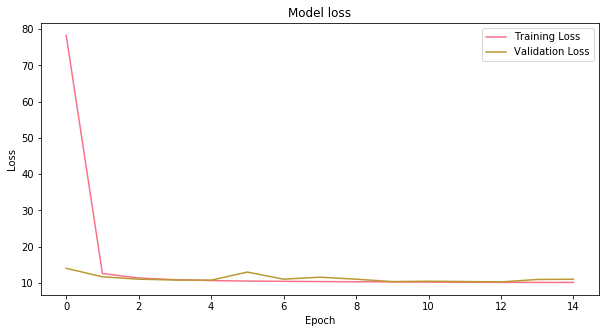

In [381]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Training Loss', 'Validation Loss'], loc='upper right')

### Predictions on Test Data in Dev Dataset

In [269]:
n_mels = param["feature"]["n_mels"]
frames = param["feature"]["frames"]
model = get_model(n_mels * frames)

In [270]:
def save_csv(save_file_path,
             save_data):
    with open(save_file_path, "w", newline="") as f:
        writer = csv.writer(f, lineterminator='\n')
        writer.writerows(save_data)

In [271]:
def get_machine_id_list_for_test(target_dir,
                                 dir_name="test",
                                 ext="wav"):
    """
    target_dir : str
        base directory path of "dev_data" or "eval_data"
    test_dir_name : str (default="test")
        directory containing test data
    ext : str (default="wav)
        file extension of audio files
    return :
        machine_id_list : list [ str ]
            list of machine IDs extracted from the names of test files
    """
    # create test files
    dir_path = os.path.abspath("{dir}/{dir_name}/*.{ext}".format(dir=target_dir, dir_name=dir_name, ext=ext))
    file_paths = sorted(glob.glob(dir_path))
    # extract id
    machine_id_list = sorted(list(set(itertools.chain.from_iterable(
        [re.findall('id_[0-9][0-9]', ext_id) for ext_id in file_paths]))))
    return machine_id_list

In [160]:
def test_file_list_generator(target_dir,
                             id_name,
                             dir_name="test",
                             prefix_normal="normal",
                             prefix_anomaly="anomaly",
                             ext="wav"):
    """
    target_dir : str
        base directory path of the dev_data or eval_data
    id_name : str
        id of wav file in <<test_dir_name>> directory
    dir_name : str (default="test")
        directory containing test data
    prefix_normal : str (default="normal")
        normal directory name
    prefix_anomaly : str (default="anomaly")
        anomaly directory name
    ext : str (default="wav")
        file extension of audio files
    return :
        if the mode is "development":
            test_files : list [ str ]
                file list for test
            test_labels : list [ boolean ]
                label info. list for test
                * normal/anomaly = 0/1
        if the mode is "evaluation":
            test_files : list [ str ]
                file list for test
    """
    logger.info("target_dir : {}".format(target_dir+"_"+id_name))

    # development
    if mode:
        normal_files = sorted(
            glob.glob("{dir}/{dir_name}/{prefix_normal}_{id_name}*.{ext}".format(dir=target_dir,
                                                                                 dir_name=dir_name,
                                                                                 prefix_normal=prefix_normal,
                                                                                 id_name=id_name,
                                                                                 ext=ext)))
        normal_labels = np.zeros(len(normal_files))
        anomaly_files = sorted(
            glob.glob("{dir}/{dir_name}/{prefix_anomaly}_{id_name}*.{ext}".format(dir=target_dir,
                                                                                  dir_name=dir_name,
                                                                                  prefix_anomaly=prefix_anomaly,
                                                                                  id_name=id_name,
                                                                                  ext=ext)))
        anomaly_labels = np.ones(len(anomaly_files))
        files = np.concatenate((normal_files, anomaly_files), axis=0)
        labels = np.concatenate((normal_labels, anomaly_labels), axis=0)
        logger.info("test_file  num : {num}".format(num=len(files)))
        if len(files) == 0:
            logger.exception("no_wav_file!!")
        print("\n========================================")

    # evaluation
    else:
        files = sorted(
            glob.glob("{dir}/{dir_name}/*{id_name}*.{ext}".format(dir=target_dir,
                                                                  dir_name=dir_name,
                                                                  id_name=id_name,
                                                                  ext=ext)))
        labels = None
        logger.info("test_file  num : {num}".format(num=len(files)))
        if len(files) == 0:
            logger.exception("no_wav_file!!")
        print("\n=========================================")

    return files, labels
########################################################################

In [273]:
# make output result directory
os.makedirs(param["result_directory"], exist_ok=True)

mode = True  # mode is False for Eval dataset and True for Dev dataset
# load base directory
dirs = select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []

# loop of the base directory
for idx, target_dir in enumerate(dirs):
    print("\n===========================")
    print("[{idx}/{total}] {dirname}".format(dirname=target_dir, idx=idx+1, total=len(dirs)))
    machine_type = os.path.split(target_dir)[1]

    print("============== MODEL LOAD ==============")
    # set model path
    model_file = "{model}/model_{machine_type}.hdf5".format(model=param["model_directory"],
                                                            machine_type=machine_type)

    # load model file
    if not os.path.exists(model_file):
        logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)
#     model = load_model(model_file)
#     model.load_wights(model_file)
    n_mels = param["feature"]["n_mels"]
    frames = param["feature"]["frames"]
    model = get_model(n_mels * frames)
    model.load_weights(model_file)
    model.summary()

#     mode = True
    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = get_machine_id_list_for_test(target_dir)

    for id_str in machine_id_list:
        # load test file
        test_files, y_true = test_file_list_generator(target_dir, id_str)

        # setup anomaly score file path
        anomaly_score_csv = "{result}/anomaly_score_{machine_type}_{id_str}.csv".format(
                                                                                 result=param["result_directory"],
                                                                                 machine_type=machine_type,
                                                                                 id_str=id_str)
        anomaly_score_list = []

        print("\n============== BEGIN TEST FOR A MACHINE ID ==============")
        y_pred = [0. for k in test_files]
        for file_idx, file_path in tqdm(enumerate(test_files), total=len(test_files)):
            try:
                data, log_mel_spectrogram, mfcc, spectrogram = file_to_vector_array(file_path,
                                                n_mels=param["feature"]["n_mels"],
                                                frames=param["feature"]["frames"],
                                                n_fft=param["feature"]["n_fft"],
                                                hop_length=param["feature"]["hop_length"],
                                                power=param["feature"]["power"])
                errors = np.mean(np.square(data - model.predict(data)), axis=1)
                y_pred[file_idx] = np.mean(errors)
                anomaly_score_list.append([os.path.basename(file_path), y_pred[file_idx]])
            except:
                logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        save_csv(save_file_path=anomaly_score_csv, save_data=anomaly_score_list)
        logger.info("anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(y_true, y_pred, max_fpr=param["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            logger.info("AUC : {}".format(auc))
            logger.info("pAUC : {}".format(p_auc))

        print("\n============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = np.mean(np.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(result=param["result_directory"], file_name=param["result_file"])
    logger.info("AUC and pAUC results -> {}".format(result_path))
    save_csv(save_file_path=result_path, save_data=csv_lines)

2020-09-10 22:17:38,209 - INFO - load_directory <- development



[1/1] C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump
============== MODEL LOAD ==============
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 640)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               82048     
_________________________________________________________________
batch_normalization_64 (Batc (None, 128)               512       
_________________________________________________________________
activation_64 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               16512     
_________________________________________________________________
b

2020-09-10 22:17:43,600 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump_id_00
2020-09-10 22:17:43,608 - INFO - test_file  num : 243




============== BEGIN TEST FOR A MACHINE ID ==============


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  9.24it/s]
2020-09-10 22:18:29,369 - INFO - anomaly score result ->  ./result/anomaly_score_pump_id_00.csv
2020-09-10 22:18:29,377 - INFO - AUC : 0.7523776223776224
2020-09-10 22:18:29,378 - INFO - pAUC : 0.7103422892896577



============ END OF TEST FOR A MACHINE ID ============


2020-09-10 22:18:29,380 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump_id_02
2020-09-10 22:18:29,389 - INFO - test_file  num : 211




============== BEGIN TEST FOR A MACHINE ID ==============


100%|████████████████████████████████████████████████████████████████████████████████| 211/211 [00:23<00:00,  8.61it/s]
2020-09-10 22:18:52,878 - INFO - anomaly score result ->  ./result/anomaly_score_pump_id_02.csv
2020-09-10 22:18:52,880 - INFO - AUC : 0.6432432432432432
2020-09-10 22:18:52,882 - INFO - pAUC : 0.5723091512565197



============ END OF TEST FOR A MACHINE ID ============


2020-09-10 22:18:52,883 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump_id_04
2020-09-10 22:18:52,892 - INFO - test_file  num : 200




============== BEGIN TEST FOR A MACHINE ID ==============


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.38it/s]
2020-09-10 22:19:14,229 - INFO - anomaly score result ->  ./result/anomaly_score_pump_id_04.csv
2020-09-10 22:19:14,234 - INFO - AUC : 0.4712
2020-09-10 22:19:14,235 - INFO - pAUC : 0.5



============ END OF TEST FOR A MACHINE ID ============


2020-09-10 22:19:14,237 - INFO - target_dir : C:\Users\DMT2KOR\OneDrive - Robert Bosch GmbH\Documents\WORK\PROJECTS\PoCs\Machine Sound Monitoring\DATA\DCASE2020\pump_basedir\dev_data\pump_id_06
2020-09-10 22:19:14,249 - INFO - test_file  num : 202




============== BEGIN TEST FOR A MACHINE ID ==============


100%|████████████████████████████████████████████████████████████████████████████████| 202/202 [00:21<00:00,  9.46it/s]
2020-09-10 22:19:35,301 - INFO - anomaly score result ->  ./result/anomaly_score_pump_id_06.csv
2020-09-10 22:19:35,305 - INFO - AUC : 0.6308823529411764
2020-09-10 22:19:35,306 - INFO - pAUC : 0.5454076367389061



============ END OF TEST FOR A MACHINE ID ============


2020-09-10 22:19:35,308 - INFO - AUC and pAUC results -> ./result/result.csv


In [274]:
target_dir

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump'

In [275]:
dir_name="test"
prefix_normal="normal"
prefix_anomaly="anomaly"
ext="wav"
# create test files
dir_path = os.path.abspath("{dir}/{dir_name}/*.{ext}".format(dir=target_dir, dir_name=dir_name, ext=ext))
file_paths = sorted(glob.glob(dir_path))
# extract id
machine_id_list = sorted(list(set(itertools.chain.from_iterable(
    [re.findall('id_[0-9][0-9]', ext_id) for ext_id in file_paths]))))

In [276]:
dir_path

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\*.wav'

In [277]:
file_paths

['C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\anomaly_id_00_00000000.wav',
 'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\anomaly_id_00_00000001.wav',
 'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\anomaly_id_00_00000002.wav',
 'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\anomaly_id_00_00000003.wav',
 'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir\\dev_data\\pump\\test\\anomaly_id_00_00000004.wav',
 'C:\\Users\\DMT2KOR\\OneDrive - Ro

In [278]:
machine_id_list

['id_00', 'id_02', 'id_04', 'id_06']

In [279]:
for id_str in machine_id_list:
    files = sorted(
        glob.glob("{dir}/{dir_name}/*{id_name}*.{ext}".format(dir=target_dir,
                                                              dir_name=dir_name,
                                                              id_name=id_str,
                                                              ext=ext)))
    labels = None
    logger.info("test_file  num : {num}".format(num=len(files)))
    if len(files) == 0:
        logger.exception("no_wav_file!!")
    print("\n=========================================")

2020-09-10 22:19:35,390 - INFO - test_file  num : 243


2020-09-10 22:19:35,399 - INFO - test_file  num : 211


2020-09-10 22:19:35,409 - INFO - test_file  num : 200


2020-09-10 22:19:35,418 - INFO - test_file  num : 202


### Inspecting Predictions for Pump Machine Id 06

In [280]:
id_str

'id_06'

In [281]:
y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [282]:
y_pred

[0.7695162115351915,
 1.4423119912340034,
 0.9614107331340205,
 0.9243421231725744,
 0.8181931401210863,
 1.342310869104572,
 1.0746268762518385,
 0.6505837823594974,
 0.6734717279641204,
 1.3052654629614848,
 0.6486980107231127,
 0.8178654469101694,
 0.7942005355753289,
 0.9178461247593931,
 0.6832419266229461,
 1.0670651408247809,
 0.7127060833534109,
 0.9206717568316491,
 1.0034948488552908,
 1.1449676312586443,
 0.6723116760788358,
 0.6522538740439667,
 1.3987855881526612,
 0.832089210719073,
 1.1453929529367288,
 1.0755834192637657,
 0.7719339166332054,
 1.1260974374717172,
 1.3297300676781898,
 1.137644005981,
 1.2740154373326955,
 1.4040702202281055,
 0.6760710360803756,
 1.3121836575711217,
 0.659042328229411,
 0.9139663414225295,
 1.191672675627551,
 0.9218854015374602,
 0.8974489066097193,
 2.621329337569174,
 1.3406995675434639,
 0.7957855906058645,
 0.7847928900798042,
 1.482507433356312,
 0.9036088453940789,
 1.431998699024108,
 1.2786658763721659,
 1.0415045291617877,
 1.

In [283]:
metrics.roc_auc_score(y_true, y_pred)

0.6308823529411764

(array([49., 41., 37., 43., 15., 11.,  0.,  3.,  2.,  1.]),
 array([0.62788156, 0.82722634, 1.02657112, 1.22591589, 1.42526067,
        1.62460545, 1.82395023, 2.023295  , 2.22263978, 2.42198456,
        2.62132934]),
 <a list of 10 Patch objects>)

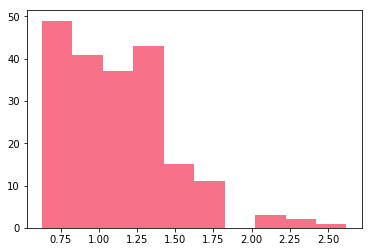

In [284]:
plt.hist(y_pred)

In [285]:
len(y_pred)

202

In [286]:
temp = pd.Series(y_pred)
temp[temp <= 10] = 0
temp[temp > 10] = 1
temp.value_counts()

0.0    202
dtype: int64

In [287]:
temp1 = list(temp.values)

In [288]:
pd.Series(y_true).value_counts()

1.0    102
0.0    100
dtype: int64

In [289]:
metrics.accuracy_score(y_true, temp1)

0.49504950495049505

In [213]:
os.getcwd()

'C:\\Users\\DMT2KOR\\OneDrive - Robert Bosch GmbH\\Documents\\WORK\\PROJECTS\\PoCs\\Machine Sound Monitoring\\DATA\\DCASE2020\\pump_basedir'

In [214]:
df = pd.read_excel('Pump_machine02_mse.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Pump_machine02_mse.xlsx'

In [215]:
df.head()

NameError: name 'df' is not defined

In [216]:
from matplotlib import pyplot
df1 = df[df['Data Type'] == 'Normal']
df2 = df[df['Data Type'] == 'Anomaly']

NameError: name 'df' is not defined

In [217]:
plt.hist(df['MSE Score'], 10, density=True, histtype='bar', label=df['Data Type'])

NameError: name 'df' is not defined

In [218]:
pyplot.hist(df2['MSE Score'], 10, density=True, histtype='bar', label='Anomaly', color = 'r', alpha=0.5)
pyplot.hist(df1['MSE Score'], 10, density=True, histtype='bar', label='Normal', color = 'g', alpha=0.5)
plt.legend(['Anomaly', 'Normal'])
plt.xlabel('MSE Value Bins')
plt.ylabel('Frequency Density')
plt.title('MSE Values Distribution for Pump Machine 02')

NameError: name 'df2' is not defined